In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.image as mpimg
import csv
import io
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

# Project: Gathering and analyze data of  WeRateDogs dataset

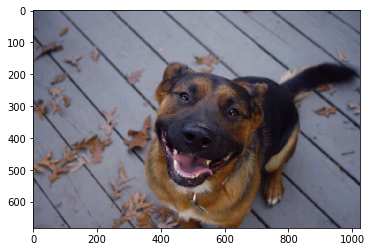

In [3]:
img=mpimg.imread('dog.jpg')
imgplot = plt.imshow(img)

## Gathering information
**Read the provided file twitter-archive-enhanced-2.csv from the local folder**

In [4]:
tw_arc = pd.read_csv('twitter-archive-enhanced-2.csv')

**Download file using the provided link** 

In [5]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
prediction = pd.read_csv(io.StringIO(r.decode('utf-8')), sep = '\t')
prediction.to_csv('prediction.tsv')
print('prediction shape', prediction.shape)
prediction.head()

prediction shape (2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Access tweets via API with tweet_id**

In [6]:
import tweepy
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os

if os.path.isfile('tweet_json.txt'):
    print("The dataset has been downloaded already and written into the tweet_json.txt file. The data will be extracted from this file below")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

    consumer_key = 'hzkXG5HqgXN6UcAAaDE4ykLdm'  #'YOUR CONSUMER KEY'
    consumer_secret = 'YLq3cp6W3rrshh8wPwCX7sLswKgiw5RkFyxj0JDzInODhp2MAR'  # 'YOUR CONSUMER SECRET'
    access_token = '60896767-HDMh9m1vUbCexrXiWnqtijslouuisAAUEDcWn6Wu8' #'YOUR ACCESS TOKEN'
    access_secret = 'oo5wfzXEyzSKa8Y763CTBvpK2JkI5TVDQv5jL040dc1Oz'  #'YOUR ACCESS SECRET'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = tw_arc.tweet_id.values
    len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

The dataset has been downloaded already and written into the tweet_json.txt file. The data will be extracted from this file below


In [7]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
#print out one json object for further reference 
tweets[0]     

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [8]:
#creat a list of data from tweet_json.txt
list_twits = []
for json_data in tweets:
    list_twits.append({'id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})
   
#creat a Dataframe
tweets_api = pd.DataFrame(list_twits, columns = ['id', 'retweet_count' , 'favorite_count']) 
#Check out the obatined DataFrame
tweets_api.head() 

,id,retweet_count,favorite_count
0,892420643555336193,8366,38188
1,892177421306343426,6177,32749
2,891815181378084864,4089,24661
3,891689557279858688,8504,41512
4,891327558926688256,9205,39700


## Data assessment

In [9]:
tw_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
tw_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
tw_arc.rating_numerator.value_counts().head(25) 

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
0        2
15       2
75       2
80       1
20       1
24       1
26       1
44       1
50       1
60       1
Name: rating_numerator, dtype: int64

In [13]:
tw_arc.in_reply_to_status_id.value_counts().head()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
Name: in_reply_to_status_id, dtype: int64

In [14]:
tw_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
tw_arc.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
tw_arc.floofer.value_counts()                       

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
tw_arc.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
tw_arc.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
tw_arc.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [20]:
tw_arc.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1649,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683742671...,11,10,Sebastian,None,None,None,None
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
1956,673612854080196609,NaN,NaN,2015-12-06 21:19:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffri. He's a speckled ice pupper. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,None,None,pupper,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1295,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@serial @MrRoles OH MY GOD I listened to all o...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None
744,780192070812196864,NaN,NaN,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,11,10,None,None,None,None,None
1425,697943111201378304,NaN,NaN,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None,None,None


In [21]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [26]:
tweets_api.describe()

,id,retweet_count,favorite_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,2948.632365,7995.830914
std,6.832408e+16,4959.194196,12376.379851
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,591.750000,1382.500000
50%,7.186224e+17,1376.500000,3479.000000
75%,7.986971e+17,3440.750000,9802.250000
max,8.924206e+17,84032.000000,164847.000000


**Note:** For me it looks like some information is missing. This variable should confirm if this is a true picture of a dog breed or not.  

In [27]:
prediction.query('tweet_id == "674063288070742018"').jpg_url

424    https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg
Name: jpg_url, dtype: object

In [28]:
prediction.query('tweet_id == "674063288070742018"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False


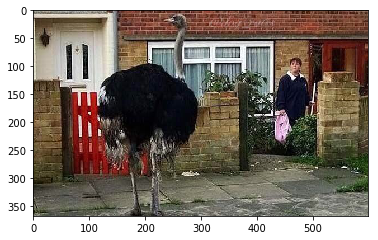

In [29]:
img=mpimg.imread('straus.jpg')
imgplot = plt.imshow(img)

In [30]:
prediction.query('tweet_id == "670822709593571328"').jpg_url

270    https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg
Name: jpg_url, dtype: object

In [31]:
prediction.query('tweet_id == "670822709593571328"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False


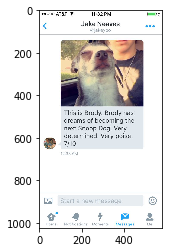

In [32]:
img=mpimg.imread('small_doggy.jpg')
imgplot = plt.imshow(img)

As we can see, one tweet has a straus on a picture and it was correctly classified as "not dog breed" while another picture has dog on it. We can see that p1_dog and p3_dog misclassified, i.e. it is not a dog breed, while p2_dog correctly classified this picture. However, we cannot confirm this information unless we open each picture, which is not possible due to a big voleume of data.   

**Quality**

*`tw_arc`* table
* column source in tw_arc is too long for such source information
* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp variables have a lot of missing data and, moreover, we do not need them for the analysis
* rating_denominator is 10 in 2333 cases out 2356 cases, consider rating_denominator to be 10
* rating_numerator in most cases is in between 0 and 15, the rest consider as outliers
* variable name has 745 None values and 55 "a" values 
* in timestamp +0000 is redundent information 
* name variable has some entries starting with low case letters(example: An). Is An a dog name? It occurs 7 time in the dataset, though.
* expanded_urls contains link which are not valid, possible because they are expired
* remove rows in retweet_count and favorite_count with missing values

*`prediction`* table
* variable img_num is not needed  

* change variable types to the appropriate, where it is needed 
* prediction table is missing one importent varaible which would show if the picture truly contains breed of dog or not like it is shown above. one picture has straus on it and algotithm classified it as it is not a breed of dog, but another picture has a dog on it; however, it was misclassified as not breed of dog

**Tidiness**

*`tw_arc`* table
* Variables doggo, floofer, pupper and puppo in one column
* tables wt_arc and tweets_api form one observational unit 

*`prediction`* table

* jpg_url variable should be in tw_arc table to satisfy tidiness definition 

* tw_arc and prediction tables form two different obseravation units and will be kept seperatly 


## Cleaning data

In [33]:
#first make copies of datasets: 

tw_arc_original = tw_arc.copy()
prediction_original = prediction.copy()
tweets_api_original = tweets_api.copy()

**Quality**

**`Define`**

URLs in source columns of tw_arc table shows source. Change provided URLs to the corresponding 4 categories  

**`Code`**

In [34]:
#We want to change this list: 
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [35]:
[tw_arc.source.replace(source_list, new_source_list, inplace=True) for current_source, new_source in zip(source_list, new_source_list)];

**`Test`**

In [36]:
tw_arc.source.sample(10)

473     Twitter for iPhone
1129    Twitter for iPhone
1067    Twitter for iPhone
1563    Twitter for iPhone
1994    Twitter for iPhone
1444    Twitter for iPhone
1817    Twitter for iPhone
2007    Twitter for iPhone
858     Twitter for iPhone
1707    Twitter for iPhone
Name: source, dtype: object

**`Define`**

drop these variables: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp  in tw_acr

In [37]:
tw_arc.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True )


**`Test`**

In [38]:
tw_arc.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**`Define`**

Let rating_denominator to be 10 for all entries. Hence, because all the entries have only one value 10, then drop this varible. You don't want to have the entire column with all zeros.    

**`Code`**

In [39]:
tw_arc.drop('rating_denominator', axis=1, inplace=True)

**`Test`**

In [40]:
tw_arc.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None


**`Define`**

If rating_numerator is higer than 15 let it be 15. Assume that 15 is the maximum possible value. Everything higher are outliers. 

**`Code`**

In [41]:
tw_arc.loc[tw_arc['rating_numerator']>15, 'rating_numerator'] = 15

**`Test`**

In [42]:
tw_arc.describe()

,tweet_id,rating_numerator
count,2.356000e+03,2356.000000
mean,7.427716e+17,10.738964
std,6.856705e+16,2.226883
min,6.660209e+17,0.000000
25%,6.783989e+17,10.000000
50%,7.196279e+17,11.000000
75%,7.993373e+17,12.000000
max,8.924206e+17,15.000000


**`Define`**

in tw_arc name 'a' and None change to NaN

**`Code`**

In [43]:
tw_arc.name.replace(['None', 'a'], np.nan, inplace=True)

**`Test`**

In [44]:
tw_arc.name.value_counts().head()

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Lola       10
Name: name, dtype: int64

**`Define`**

Remove +0000 from timestamp 

**`Code`**

In [45]:
tw_arc.timestamp = tw_arc.timestamp.str[:-5].str.strip()

**`Test`**

In [46]:
tw_arc.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

**`Define`**

Convert lowcase names in variable name to Title

**`Code`**

In [47]:
tw_arc.name =tw_arc.name.str.title()

**`Test`**

In [48]:
tw_arc.name.sample(5)

1724         By
2221       Dayz
1734        NaN
415     Paisley
1228        NaN
Name: name, dtype: object

**`Define`**

Drop img_num from prediction table 

**`Code`**

In [49]:
prediction.drop('img_num', axis = 1, inplace = True)


**`Test`**

In [50]:
prediction.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


**`Define`**

Variables doggo, floofer, pupper and puppo move to one variable called classifier

**`Code`**

In [51]:
tw_arc_temp=tw_arc[~((tw_arc['doggo'] != 'doggo') & (tw_arc['floofer'] != 'floofer') & (tw_arc['pupper'] != 'pupper') & (tw_arc['puppo'] != 'puppo'))].replace('None', np.nan)




In [52]:
tw_arc_temp = pd.melt(tw_arc_temp, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'name'],
                      var_name = 'var_name', value_name = 'classifier')

In [53]:
tw_arc_temp.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,var_name,classifier
1231,805823200554876929,2016-12-05 17:16:37,Twitter for iPhone,RT @dog_rates: This is Reginald. He's one magi...,"https://vine.co/v/5ghHLBMMdlV,https://vine.co/...",12,Reginald,puppo,puppo
18,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,NaN,doggo,doggo
903,771004394259247104,2016-08-31 15:19:06,Twitter for iPhone,RT @katieornah: @dog_rates learning a lot at c...,https://twitter.com/katieornah/status/77100213...,12,NaN,pupper,pupper
106,798682547630837760,2016-11-16 00:22:12,Twitter for iPhone,RT @dog_rates: Here we see a rare pouched pupp...,https://twitter.com/dog_rates/status/676936541...,8,NaN,doggo,NaN
179,749317047558017024,2016-07-02 19:01:20,Twitter for iPhone,This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12,Blu,doggo,NaN


In [54]:
tw_arc_temp.dropna(subset=['classifier'], inplace = True)

In [55]:
tw_arc_temp.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,var_name,classifier
802,833124694597443584,2017-02-19 01:23:00,Twitter for iPhone,This is Gidget. She's a spy pupper. Stealthy a...,https://twitter.com/dog_rates/status/833124694...,12,Gidget,pupper,pupper
1070,683142553609318400,2016-01-02 04:27:31,Twitter for iPhone,Meet Brandy. She's a member of the Bloods. Men...,https://twitter.com/dog_rates/status/683142553...,9,Brandy,pupper,pupper
1110,675113801096802304,2015-12-11 00:44:07,Twitter for iPhone,Meet Zuzu. He just graduated college. Astute p...,https://twitter.com/dog_rates/status/675113801...,10,Zuzu,pupper,pupper
1071,683111407806746624,2016-01-02 02:23:45,Twitter for iPhone,This is Larry. He thought the New Year's parti...,https://twitter.com/dog_rates/status/683111407...,10,Larry,pupper,pupper
873,791821351946420224,2016-10-28 01:58:16,Twitter for iPhone,RT @dog_rates: This little fella really hates ...,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,NaN,pupper,pupper


In [56]:
#Before we merge it with tw_arc get rid of redundent variables in both tables 
tw_arc_temp.drop(['timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'name', 'var_name'], axis = 1, inplace=True)

In [57]:
tw_arc_temp.sample(5)

,tweet_id,classifier
796,837820167694528512,pupper
991,712309440758808576,pupper
838,817502432452313088,pupper
127,780074436359819264,doggo
981,724405726123311104,pupper


In [58]:
tw_arc.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1 , inplace = True)

In [59]:
tw_arc.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name
1213,715220193576927233,2016-03-30 16:52:36,Twitter for iPhone,This is Nico. His selfie game is strong af. Ex...,https://twitter.com/dog_rates/status/715220193...,10,Nico
2193,668902994700836864,2015-11-23 21:24:36,Twitter for iPhone,Meet Lambeau. He's a Whistling Haiku from the ...,https://twitter.com/dog_rates/status/668902994...,11,Lambeau
517,810896069567610880,2016-12-19 17:14:23,Twitter for iPhone,This is Hunter. He just found out he needs bra...,https://twitter.com/dog_rates/status/810896069...,11,Hunter
19,888202515573088257,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,Canela
1458,695074328191332352,2016-02-04 02:40:08,Twitter for iPhone,This is Lorenzo. He's educated af. Just gradua...,https://twitter.com/dog_rates/status/695074328...,11,Lorenzo


In [60]:
tw_arc = tw_arc.merge(tw_arc_temp, on='tweet_id', how='left')


In [61]:
tw_arc.classifier.fillna('not classified', inplace=True)

**`Test`**

In [62]:
tw_arc.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,classifier
933,756275833623502848,2016-07-21 23:53:04,Twitter for iPhone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,NaN,puppo
839,768909767477751808,2016-08-25 20:35:48,Twitter for iPhone,RT @dog_rates: When it's Janet from accounting...,https://twitter.com/dog_rates/status/700143752...,10,NaN,pupper
422,822163064745328640,2017-01-19 19:25:24,Twitter for iPhone,RT @dog_rates: This is Mattie. She's extremely...,https://twitter.com/dog_rates/status/786233965...,11,Mattie,not classified
1892,675047298674663426,2015-12-10 20:19:52,Twitter for iPhone,This is a fluffy albino Bacardi Columbia mix. ...,https://twitter.com/dog_rates/status/675047298...,11,NaN,not classified
1070,741793263812808706,2016-06-12 00:44:30,Twitter for iPhone,When your crush won't pay attention to you. Bo...,https://twitter.com/dog_rates/status/741793263...,10,NaN,not classified


In [63]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 8 columns):
tweet_id            2370 non-null int64
timestamp           2370 non-null object
source              2370 non-null object
text                2370 non-null object
expanded_urls       2311 non-null object
rating_numerator    2370 non-null int64
name                1562 non-null object
classifier          2370 non-null object
dtypes: int64(2), object(6)
memory usage: 166.6+ KB


In [64]:
tw_arc.classifier.sample(10)

1730    not classified
2121    not classified
1810    not classified
49              pupper
748     not classified
1924    not classified
1917            pupper
549     not classified
1090    not classified
1997    not classified
Name: classifier, dtype: object

**`Define`**

Merge tw_arc and tweets_api tables together

**`Code`**

In [65]:
tw_arc.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,classifier
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,not classified


In [66]:
tweets_api.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8366,38188


In [67]:
tw_arc = tw_arc.merge(tweets_api, how='left', left_on='tweet_id', right_on='id')

In [68]:
tw_arc.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,classifier,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,not classified,8.924206e+17,8366.0,38188.0


In [69]:
#Remove redundent variable id
tw_arc.drop('id', axis=1, inplace = True)

**`Test`**

In [70]:
tw_arc.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,classifier,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,not classified,8366.0,38188.0


**`Define`**

Move jpg_url from prediction to tw_arc and drop jpg_url

**`Code`**

In [71]:
prediction.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [72]:
tw_arc = tw_arc.merge(prediction, on='tweet_id', how="left")

In [73]:
tw_arc.drop(["p1", 'p1_conf','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)
prediction.drop('jpg_url', axis = 1, inplace = True)

**`Test`**

In [74]:
tw_arc.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,classifier,retweet_count,favorite_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,not classified,8366.0,38188.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


In [75]:
prediction.head(1)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


**`Define`**

Drop expanded_urls 

**`Code`**

In [76]:
tw_arc.drop('expanded_urls', axis=1, inplace=True)

**`Test`**

In [77]:
tw_arc.head(1)

,tweet_id,timestamp,source,text,rating_numerator,name,classifier,retweet_count,favorite_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,not classified,8366.0,38188.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


**`Define`**

Change variable types to appropriate

**`Code`**

In [78]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 10 columns):
tweet_id            2370 non-null int64
timestamp           2370 non-null object
source              2370 non-null object
text                2370 non-null object
rating_numerator    2370 non-null int64
name                1562 non-null object
classifier          2370 non-null object
retweet_count       2356 non-null float64
favorite_count      2356 non-null float64
jpg_url             2088 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 203.7+ KB


**We can see that retweet_count and favorite_count have  14 missing values. Let's remove rows with missing values.**

In [79]:
tw_arc.dropna(subset = ['retweet_count', 'favorite_count'], inplace=True )

In [80]:
tw_arc.tweet_id = tw_arc.tweet_id.astype(str)
tw_arc.timestamp = pd.to_datetime(tw_arc.timestamp)    
tw_arc.source = tw_arc.source.astype(str)
tw_arc.text = tw_arc.text.astype(str)
tw_arc.name = tw_arc.name.astype(str)
tw_arc.classifier = tw_arc.classifier.astype('category')
tw_arc.retweet_count = tw_arc.retweet_count.astype('int64')
tw_arc.favorite_count = tw_arc.favorite_count.astype('int64')
tw_arc.jpg_url = tw_arc.jpg_url.astype(str)

**``Test``**

In [81]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2369
Data columns (total 10 columns):
tweet_id            2356 non-null object
timestamp           2356 non-null datetime64[ns]
source              2356 non-null object
text                2356 non-null object
rating_numerator    2356 non-null int64
name                2356 non-null object
classifier          2356 non-null category
retweet_count       2356 non-null int64
favorite_count      2356 non-null int64
jpg_url             2356 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 186.6+ KB


In [82]:
#where info gives object check a cell:
type(tw_arc.tweet_id[0])

str

In [83]:
type(tw_arc.source[0])

str

In [84]:
type(tw_arc.text[0])

str

In [85]:
type(tw_arc.text[0])

str

In [86]:
type(tw_arc.jpg_url[0])

str

In [87]:
tw_arc.head()

,tweet_id,timestamp,source,text,rating_numerator,name,classifier,retweet_count,favorite_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,not classified,8366,38188,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,not classified,6177,32749,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,not classified,4089,24661,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,not classified,8504,41512,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,not classified,9205,39700,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


**Because preidction table does not have a variable which shows if it is truly a breed of dog or not as it was shown above we cannot extract information how effective this algorithm. Because of this we won't keep this table** 

## Store files to csv 

In [88]:
tw_arc.to_csv('twitter_archive_master.csv')
prediction.to_csv('twitter_archive_prediction.csv')

## Analyzing and Visualizing Data

In [89]:
tw_arc.head()

,tweet_id,timestamp,source,text,rating_numerator,name,classifier,retweet_count,favorite_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,not classified,8366,38188,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,not classified,6177,32749,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,not classified,4089,24661,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,not classified,8504,41512,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,not classified,9205,39700,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [90]:
tw_arc.describe()

,rating_numerator,retweet_count,favorite_count
count,2356.000000,2356.000000,2356.000000
mean,10.731324,2965.863328,8028.165959
std,2.225401,4974.176891,12401.389779
min,0.000000,0.000000,0.000000
25%,10.000000,595.750000,1384.750000
50%,11.000000,1394.000000,3511.500000
75%,12.000000,3438.250000,9813.750000
max,15.000000,84032.000000,164847.000000


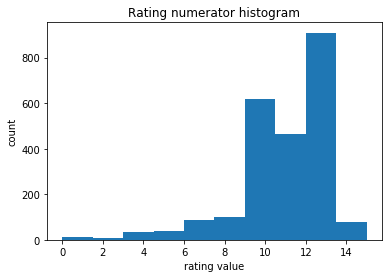

In [91]:
fig, ax = plt.subplots()
plt.hist(tw_arc.rating_numerator);
plt.title('Rating numerator histogram');
ax.set_ylabel('count');
ax.set_xlabel('rating value');

*Let's define a confidence interval for the mean of the rating_numerator using a bootstrapping method*

In [92]:
sample = tw_arc.rating_numerator.sample(300)

In [93]:
sample_means = np.random.choice(sample, size=(10000, 200)).mean(axis=1)
sample_means

array([ 10.43 ,  10.805,  10.635, ...,  10.64 ,  10.72 ,  10.42 ])

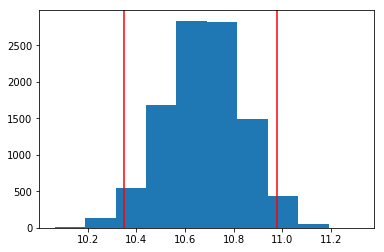

In [94]:
left, right = np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5), 
plt.hist(sample_means);
plt.axvline(left, color='r');
plt.axvline(right, color='r');

In [95]:
print("We can expect the mean of our population to be in between {} and {}".format(left, right))

We can expect the mean of our population to be in between 10.35 and 10.980125


Plot histogram for retweet_count

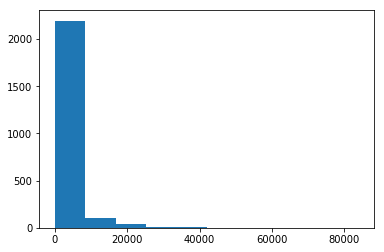

In [96]:
plt.hist(tw_arc.retweet_count);

We can say that this histogram is skewed left and has outliers. Plot boxplot to define outliers:

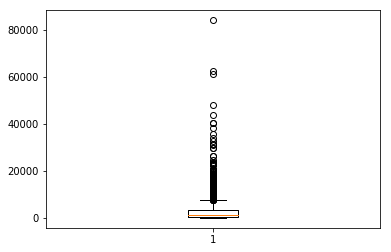

In [97]:
plt.boxplot(tw_arc.retweet_count);

We can see that outliers are above 5000. Plot hist for values less then 5000: 

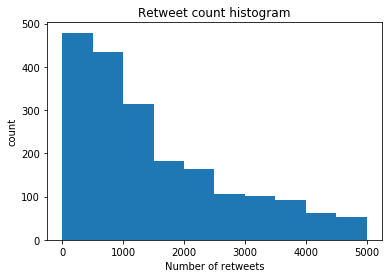

In [98]:
box_rc = tw_arc[tw_arc.retweet_count < 5000]
fig, ax = plt.subplots()
plt.hist(box_rc.retweet_count);
plt.title('Retweet count histogram');
ax.set_ylabel('count');
ax.set_xlabel('Number of retweets');

Calculate mean and standard deviation:

In [99]:
print('mean: {}, standard deviation: {}'.format(np.mean(tw_arc.retweet_count), np.std(tw_arc.retweet_count)))

mean: 2965.863327674024, standard deviation: 4973.121139100973


Plot hist for favorite_count

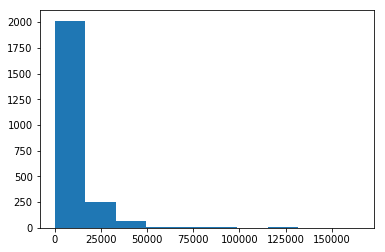

In [100]:
plt.hist(tw_arc.favorite_count);

Outliers are presented here 

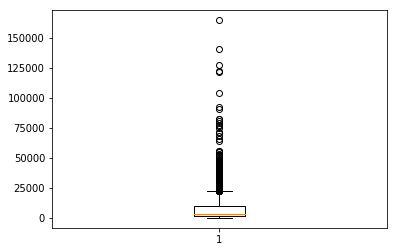

In [101]:
plt.boxplot(tw_arc.favorite_count);

Assume that outliers are everything above 25000

In [102]:
box_fc = tw_arc[tw_arc.favorite_count < 25000]

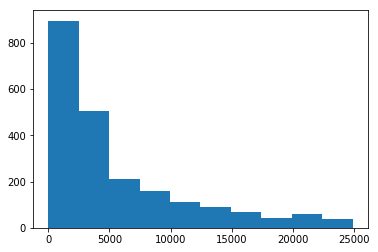

In [103]:
plt.hist(box_fc.favorite_count);

Calculate mean and standard deviation:

In [104]:
print('mean: {}, standard deviation: {}'.format(np.mean(tw_arc.favorite_count), np.std(tw_arc.favorite_count)))

mean: 8028.165959252971, standard deviation: 12398.757625548309


Investigate correlations between parameters

1. between retweet_count and favorite_count

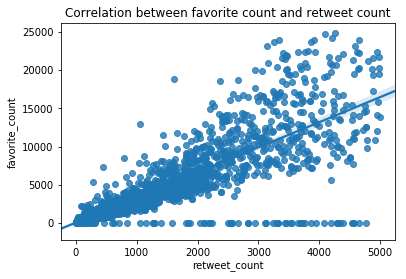

In [105]:
import seaborn as sns #https://stackoverflow.com/questions/37234163/how-to-add-a-line-of-best-fit-to-scatter-plot
mask = ((tw_arc['retweet_count']<5000) & (tw_arc['favorite_count']<25000))
sns.regplot(tw_arc[mask].retweet_count, tw_arc[mask].favorite_count)
plt.title('Correlation between favorite count and retweet count');

favorite_counte = 0 we can consider as outliers 

In [106]:
mask = (tw_arc['favorite_count']!=0) & (tw_arc['retweet_count']<5000) & (tw_arc['favorite_count']<25000)

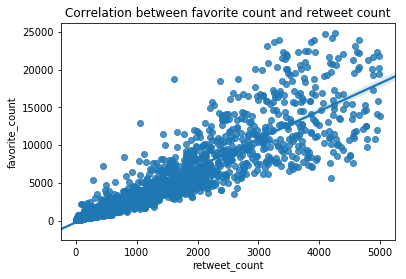

In [107]:
sns.regplot(tw_arc[mask].retweet_count, tw_arc[mask].favorite_count);
plt.title('Correlation between favorite count and retweet count');

In [108]:
#calculate correlation coeffcients: 
np.corrcoef(tw_arc[mask].retweet_count, tw_arc[mask].favorite_count)[0,1]

0.88713905374588098

Hence, we have a very strong, positive correlation 

2. Correlation between retweet_count and rating_numerator

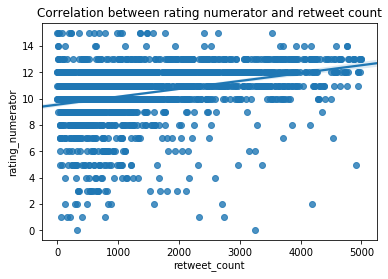

In [109]:
sns.regplot(tw_arc[mask].retweet_count, tw_arc[mask].rating_numerator);
plt.title('Correlation between rating numerator and retweet count');

In [110]:
#calculate correlation coeffcients: 
np.corrcoef(tw_arc[mask].retweet_count, tw_arc[mask].rating_numerator)[0,1]

0.3191468453127424

Hence, these parameters have weak, positive correlation 

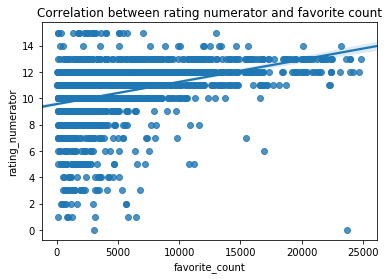

In [111]:
sns.regplot(tw_arc[mask].favorite_count, tw_arc[mask].rating_numerator);
plt.title('Correlation between rating numerator and favorite count');

In [112]:
np.corrcoef(tw_arc[mask].favorite_count, tw_arc[mask].rating_numerator)[0,1]

0.37313005272247868

Hence, these parameters have weak, positive correlation 

Let's plot bar charts for Source and Classifier variables 

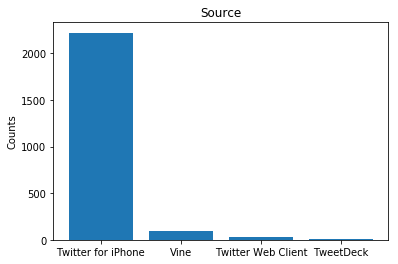

In [113]:
counts = [tw_arc.query('source == "Twitter for iPhone"').count()[0], tw_arc.query('source == "Vine"').count()[0],
          tw_arc.query('source == "Twitter Web Client"').count()[0], tw_arc.query('source == "TweetDeck"').count()[0]]
ind = np.arange(1, 5)
fig, ax = plt.subplots();
plt.bar(ind, counts);
ax.set_xticks(ind);
ax.set_xticklabels(new_source_list);
ax.set_ylabel('Counts');
ax.set_title('Source');

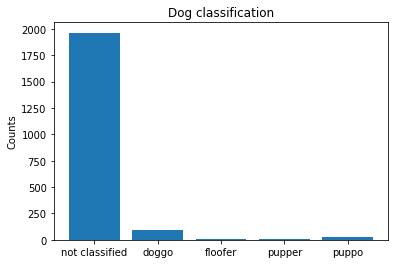

In [114]:
doggo_list= ['not classified','doggo', 'floofer', 'pupper', 'puppo']
counts = [tw_arc.query('classifier == "not classified"').count()[0], tw_arc.query('classifier == "doggo"').count()[0], tw_arc.query('classifier == "floofer"').count()[0],
          tw_arc.query('classifier == "floofer"').count()[0], tw_arc.query('classifier == "puppo"').count()[0]]
ind = np.arange(1, 6)
fig, ax = plt.subplots();
plt.bar(ind, counts);
ax.set_xticks(ind);
ax.set_xticklabels(doggo_list);
ax.set_ylabel('Counts');
ax.set_title('Dog classification');